import  The Dependency

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes
import os





load the raw data

In [183]:
# Reload the raw dataset to start fresh
df = pd.read_csv('../data/raw/benin-malanville.csv')



step-2 Initial Explaratory of Data Analaysis

In [184]:

print("Data shape:", df.shape)

# Show summary of selected columns
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())

Data shape: (525600, 19)
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961      28.179683   
std       331.131327     261.710501     158.691074       5.924297   
min       -12.900000      -7.800000     -12.600000      11.000000   
25%        -2.000000      -0.500000      -2.100000      24.200000   
50%         1.800000      -0.100000       1.600000      28.000000   
75%       483.400000     314.200000     216.300000      32.300000   
max      1413.000000     952.300000     759.200000      43.800000   

                  WS  
count  525600.000000  
mean        2.121113  
std         1.603466  
min         0.000000  
25%         1.000000  
50%         1.900000  
75%         3.100000  
max        19.500000  


Summary statics 

In [185]:
# Summary statistics of all numeric columns
summary_stats = df.describe()
display(summary_stats)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [186]:
# Check how many rows have negative values for each column
for col in ['GHI', 'DNI', 'DHI']:
    negative_count = len(df[df[col] < 0])
    print(f"Number of rows with {col} < 0: {negative_count} ({negative_count / len(df) * 100:.2f}%)")
# How many rows do we actually have?
# Check data types
print("\nChecking Column Data Types:")
print(df.dtypes)


Number of rows with GHI < 0: 258847 (49.25%)
Number of rows with DNI < 0: 275987 (52.51%)
Number of rows with DHI < 0: 259182 (49.31%)

Checking Column Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [187]:
# Missing values count per column
missing_values = df.isna().sum()
display(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [188]:
# Summary of categorical columns (text output)
print("\nSummary of categorical columns\n")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value Counts of {col}:")
    print(df[col].value_counts())


Summary of categorical columns

Value Counts of Timestamp:
Timestamp
2022-08-08 23:44    1
2022-08-08 23:43    1
2022-08-08 23:42    1
2022-08-08 23:41    1
2022-08-08 23:40    1
                   ..
2021-08-09 00:05    1
2021-08-09 00:04    1
2021-08-09 00:03    1
2021-08-09 00:02    1
2021-08-09 00:01    1
Name: count, Length: 525600, dtype: int64


In [189]:
# Columns with more than 5% missing values
missing_percent = (missing_values / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)

Columns with >5% missing values:
Comments    100.0
dtype: float64


step-3 Pre-Proccesing

In [190]:
# Drop columns with more than 5% missing values
df = df.drop(columns=["Comments"])

Set Negative Values to zero

In [191]:
irr_cols = ['GHI', 'DNI', 'DHI']
for col in irr_cols:
    df[col] = df[col].clip(lower=0)  # Set negative values to 0
    print(f"After clipping, number of rows with {col} < 0: {len(df[df[col] < 0])}")

After clipping, number of rows with GHI < 0: 0
After clipping, number of rows with DNI < 0: 0
After clipping, number of rows with DHI < 0: 0


In [192]:
#Convert Timestamp to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

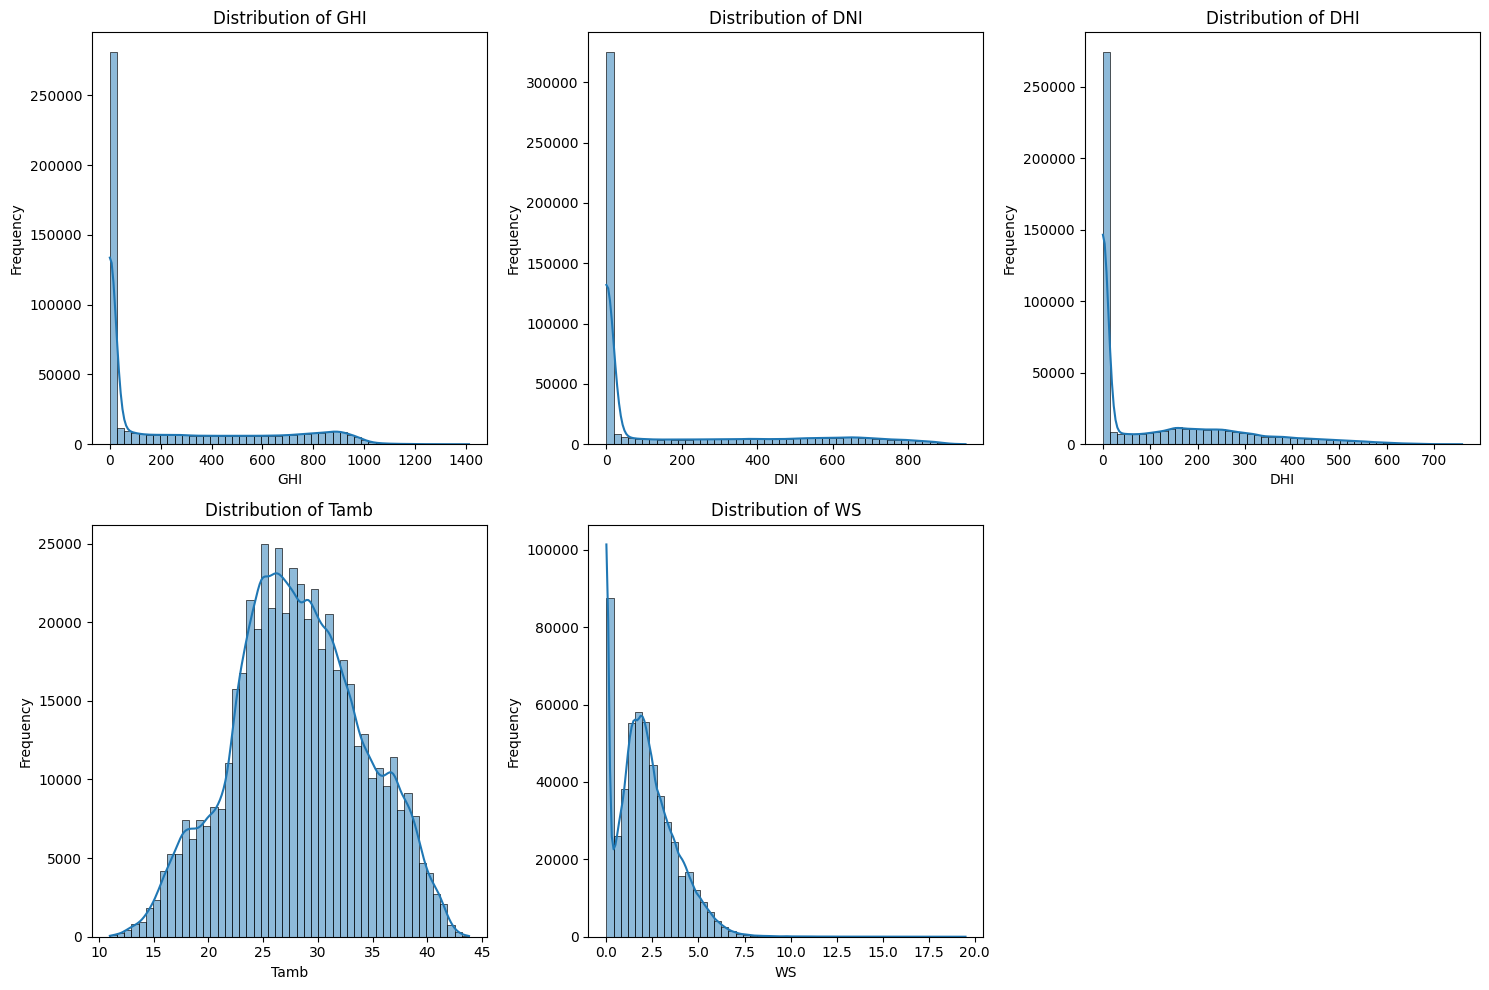

In [193]:


# Set up a grid for plots
cols_to_check = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [194]:

# Define key columns for outlier detection
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Detect and handle outliers using Z-scores
for col in key_cols:
    if col in df.columns:

        # Calculate Z-scores, ignoring NaN
        z_scores = stats.zscore(df[col].dropna())

        # Create a mask for outliers (|Z| > 3)
        outlier_mask = abs(z_scores) > 3

        # Get the original indices of outliers
        outlier_indices = df.index[np.where(outlier_mask)[0]]
        print(f"Number of outliers for {col}: {len(outlier_indices)}")
        
        # Impute outliers with the median (only for non-NaN values)
        df.loc[outlier_indices, col] = df[col].median()

# Verify the shape and summary statistics after outlier handling
print("\nData shape after outlier handling:", df.shape)
print("\nSummary Statistics after outlier handling:")
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())

Number of outliers for GHI: 90
Number of outliers for DNI: 2
Number of outliers for DHI: 3889
Number of outliers for ModA: 27
Number of outliers for ModB: 63
Number of outliers for WS: 3109
Number of outliers for WSgust: 3500

Data shape after outlier handling: (525600, 17)

Summary Statistics after outlier handling:
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      241.739837     167.438243     112.371911      28.179683   
std       329.836198     261.543255     151.485846       5.924297   
min         0.000000       0.000000       0.000000      11.000000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         1.800000       0.000000       1.600000      28.000000   
75%       482.900000     314.200000     210.300000      32.300000   
max      1232.000000     950.300000     589.300000      43.800000   

                  WS  
count  525600.000000  
mean        2

EDA 

In [195]:

# How many rows do we actually have?
print("Data shape:", df.shape)

# Show summary of selected columns
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())



# Summary statistics of all numeric columns
summary_stats = df.describe()
display(summary_stats)
# Check how many rows have negative values for each column
for col in ['GHI', 'DNI', 'DHI']:
    negative_count = len(df[df[col] < 0])
    print(f"Number of rows with {col} < 0: {negative_count} ({negative_count / len(df) * 100:.2f}%)")

# Check data types
print("\nChecking Column Data Types:")
print(df.dtypes)

# Missing values count per column
missing_values = df.isna().sum()
display(missing_values)

# Summary of categorical columns (text output)
print("\nSummary of categorical columns\n")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value Counts of {col}:")
    print(df[col].value_counts())

# Columns with more than 5% missing values
missing_percent = (missing_values / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)    


Data shape: (525600, 17)
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      241.739837     167.438243     112.371911      28.179683   
std       329.836198     261.543255     151.485846       5.924297   
min         0.000000       0.000000       0.000000      11.000000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         1.800000       0.000000       1.600000      28.000000   
75%       482.900000     314.200000     210.300000      32.300000   
max      1232.000000     950.300000     589.300000      43.800000   

                  WS  
count  525600.000000  
mean        2.082432  
std         1.521898  
min         0.000000  
25%         1.000000  
50%         1.900000  
75%         3.000000  
max         6.900000  


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.739837,167.438243,112.371911,236.524528,228.737160,28.179683,54.487969,2.082432,2.754888,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,329.836198,261.543255,151.485846,326.815176,316.357415,5.924297,28.073069,1.521898,1.912898,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,482.900000,314.200000,210.300000,463.600000,447.600000,32.300000,80.100000,3.000000,3.900000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1232.000000,950.300000,589.300000,1215.000000,1177.000000,43.800000,100.000000,6.900000,8.700000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


Number of rows with GHI < 0: 0 (0.00%)
Number of rows with DNI < 0: 0 (0.00%)
Number of rows with DHI < 0: 0 (0.00%)

Checking Column Data Types:
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object


GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


Summary of categorical columns

Columns with >5% missing values:
Series([], dtype: float64)


Visualization

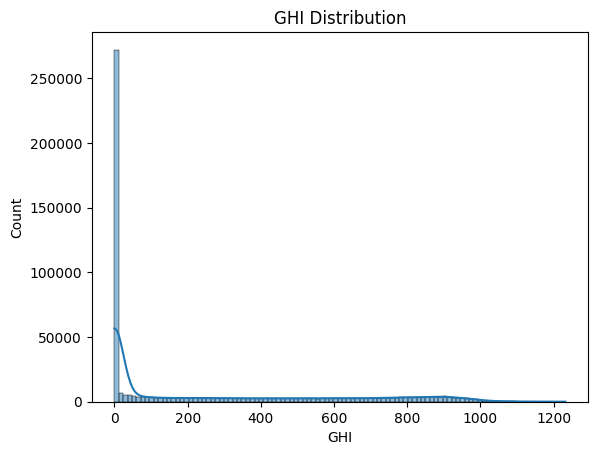

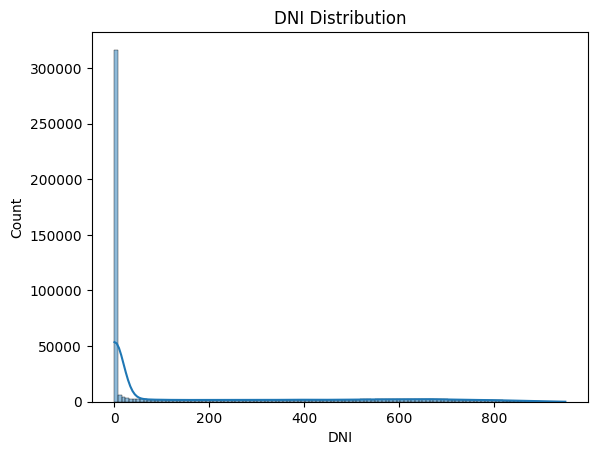

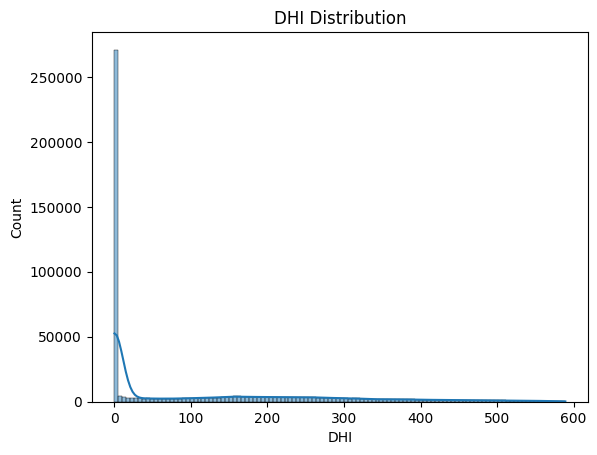

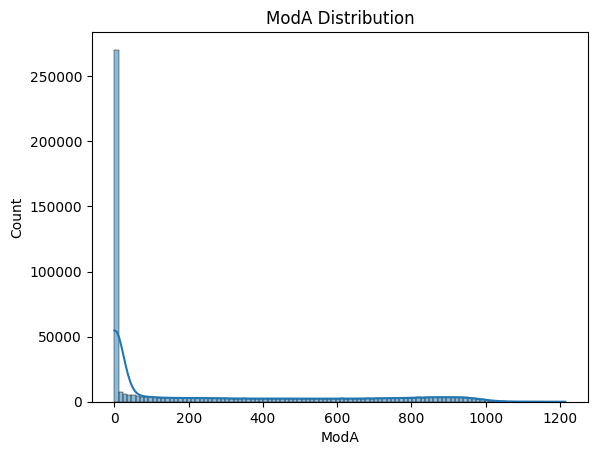

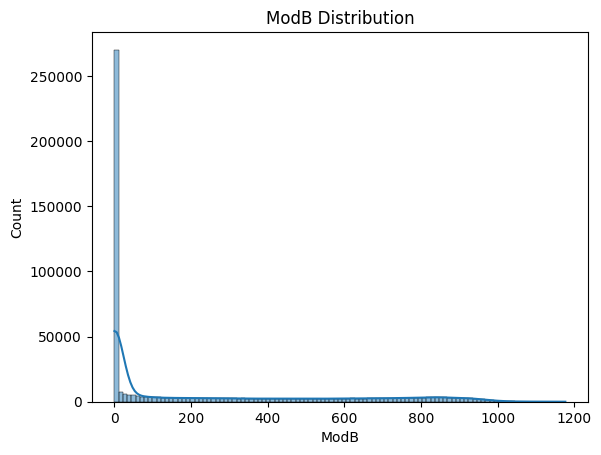

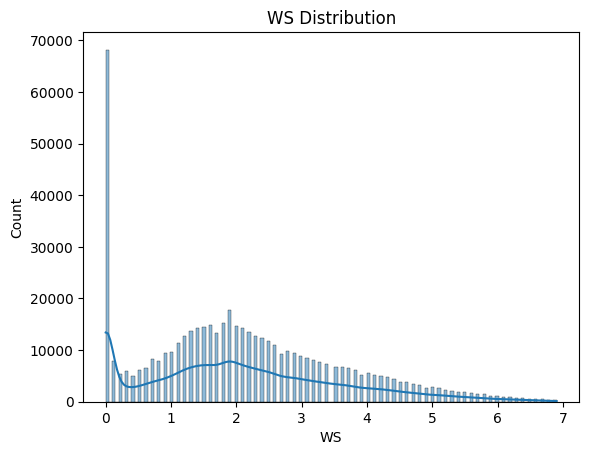

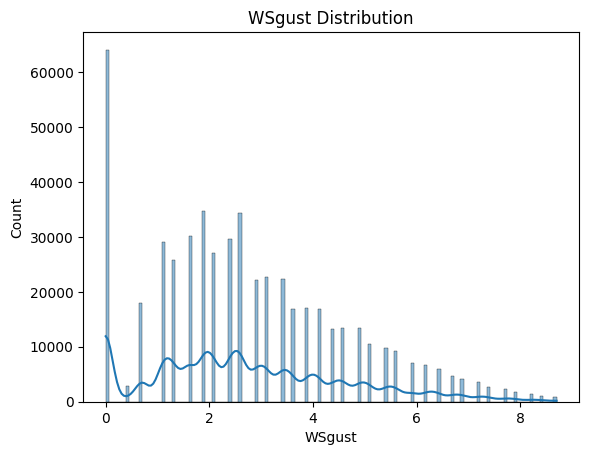

<Figure size 640x480 with 0 Axes>

In [196]:
# Histograms for each numeric feature
for col in key_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    plt.savefig('notebooks/benin/histogram')

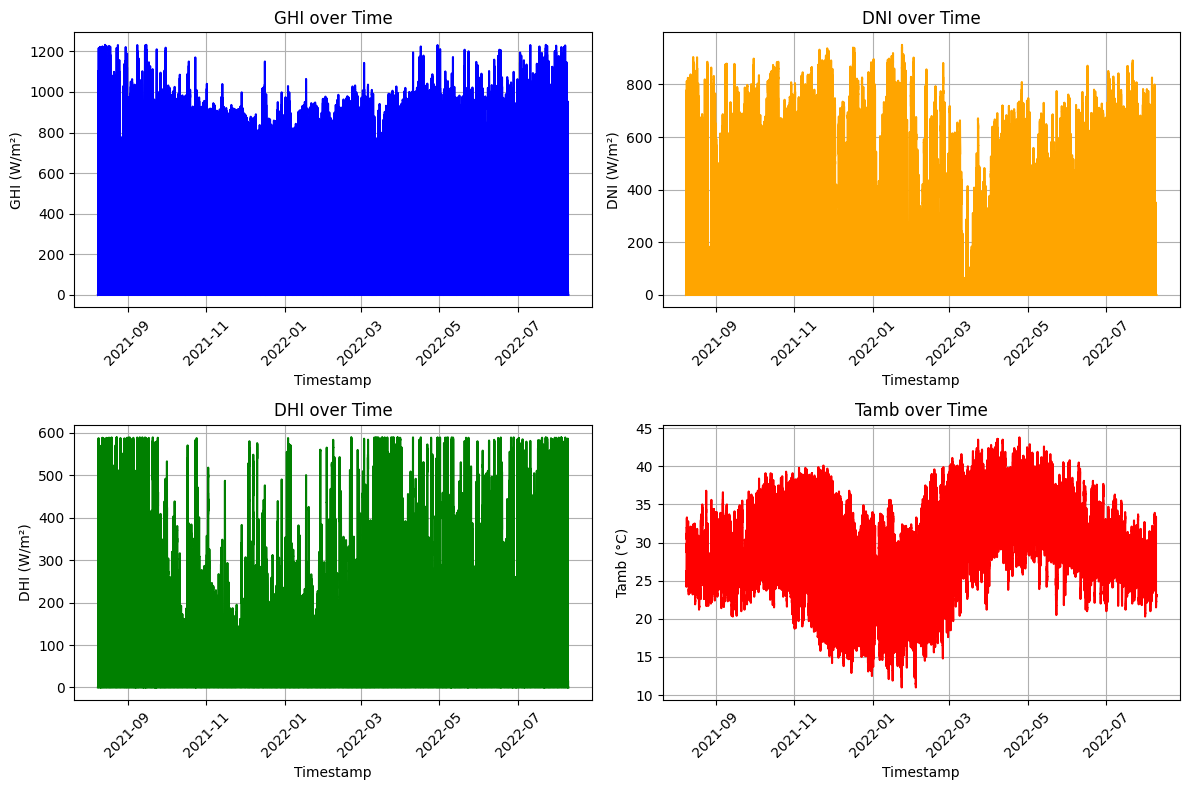

In [197]:

# Plot line charts for GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 8))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='blue')
plt.title('GHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='orange')
plt.title('DNI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('DHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Tamb over Time')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('notebooks/benin/timeseries_plots.png')
plt.show()

In [198]:
# Analyze patterns by month
monthly_avg = df.groupby(df.index.month)[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("Monthly Averages:\n", monthly_avg)

Monthly Averages:
                   GHI         DNI         DHI       Tamb
Timestamp                                               
1          238.208672  223.837740   87.245072  23.328141
2          264.001133  183.969382  124.409345  25.814008
3          249.390988  102.312684  137.061145  31.699034
4          269.932141  160.909766  132.437373  33.773639
5          257.592106  147.307014  132.609153  32.495177
6          233.569317  144.727801  117.556850  29.332551
7          222.990475  130.278300  119.372059  27.329886
8          199.329982   99.175948  115.567135  26.489048
9          223.252852  128.325472  117.137912  27.157532
10         262.199496  222.395853   96.425650  29.229462
11         250.570456  256.908984   76.731718  27.419646
12         232.329111  211.391015   92.893026  24.019283


In [199]:
# Analyze patterns by hour of the day
hourly_avg = df.groupby(df.index.hour)[['GHI', 'DNI', 'DHI']].mean()
print("\nHourly Averages:\n", hourly_avg)

# Look for anomalies (e.g., GHI spikes)
ghi_spikes = df[df['GHI'] > df['GHI'].quantile(0.99)]  # Top 1% of GHI values
print("\nPotential GHI Anomalies (Spikes):\n", ghi_spikes[['GHI']])


Hourly Averages:
                   GHI         DNI         DHI
Timestamp                                    
0            0.000297    0.001356    0.000123
1            0.000000    0.001169    0.000078
2            0.001306    0.001379    0.001845
3            0.001288    0.001096    0.001676
4            0.000146    0.001050    0.000315
5            0.000050    0.000881    0.000169
6            4.633046    1.267279    4.450799
7           82.797388   72.359817   64.844370
8          264.111726  237.557046  162.886703
9          462.279078  354.080233  242.170553
10         651.065927  436.337954  306.007342
11         775.300370  483.124388  316.780128
12         826.205361  500.168781  316.025635
13         809.593128  492.354781  322.603548
14         730.114393  470.921420  318.359324
15         581.463402  418.646580  280.539009
16         392.097502  335.606237  211.212584
17         186.990009  187.947324  121.799100
18          34.786854   28.135416   28.928671
19           0.

Average ModA and ModB by Cleaning Flag:
                 ModA        ModB
Cleaning                        
0         236.459225  228.669520
1         307.229278  301.972165


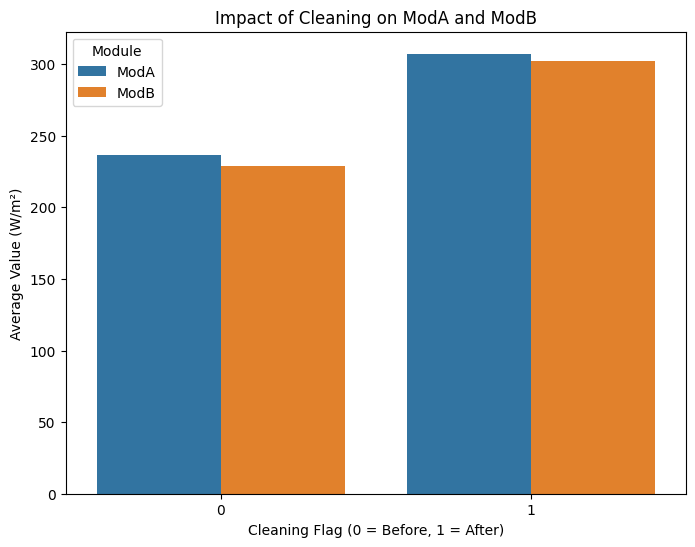

In [200]:


# Group by Cleaning flag and calculate mean for ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB by Cleaning Flag:\n", cleaning_impact)

# Plot the impact of cleaning on ModA and ModB
cleaning_impact_melted = cleaning_impact.reset_index().melt(id_vars='Cleaning', value_vars=['ModA', 'ModB'], var_name='Module', value_name='Value')
plt.figure(figsize=(8, 6))
sns.barplot(x='Cleaning', y='Value', hue='Module', data=cleaning_impact_melted)
plt.title('Impact of Cleaning on ModA and ModB')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Value (W/m²)')
plt.savefig('notebooks/benin/cleaning_impact_plot.png')
plt.show()

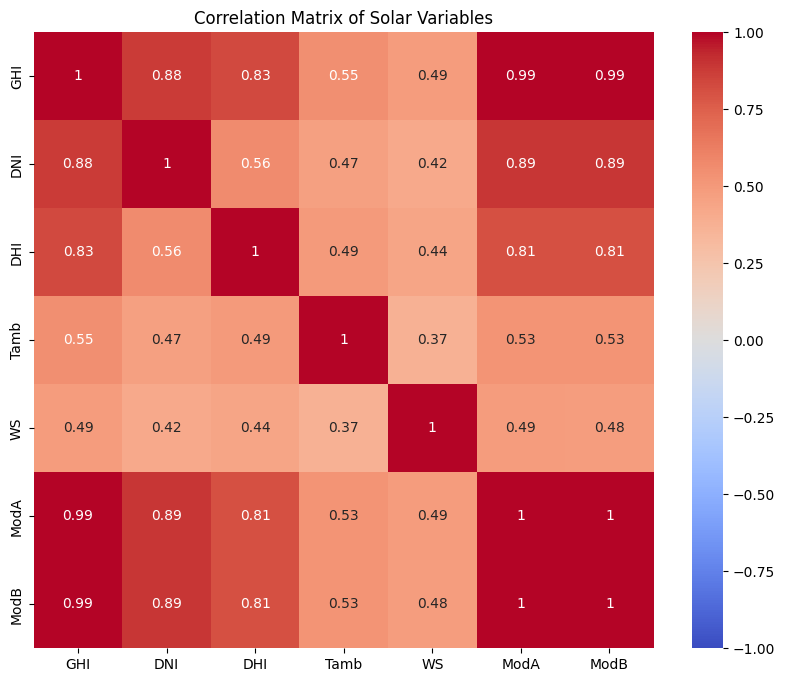

Correlation Matrix:
            GHI       DNI       DHI      Tamb        WS      ModA      ModB
GHI   1.000000  0.881421  0.829456  0.547298  0.485852  0.993705  0.994128
DNI   0.881421  1.000000  0.564613  0.467416  0.421506  0.891606  0.891274
DHI   0.829456  0.564613  1.000000  0.492196  0.442423  0.811773  0.811339
Tamb  0.547298  0.467416  0.492196  1.000000  0.373560  0.526925  0.525482
WS    0.485852  0.421506  0.442423  0.373560  1.000000  0.486625  0.478478
ModA  0.993705  0.891606  0.811773  0.526925  0.486625  1.000000  0.998264
ModB  0.994128  0.891274  0.811339  0.525482  0.478478  0.998264  1.000000


In [201]:
# Select columns for correlation analysis
correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'ModA', 'ModB']

# Compute correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Solar Variables')
plt.savefig('notebooks/benin/correlation_heatmap.png')
plt.show()

print("Correlation Matrix:\n", correlation_matrix)

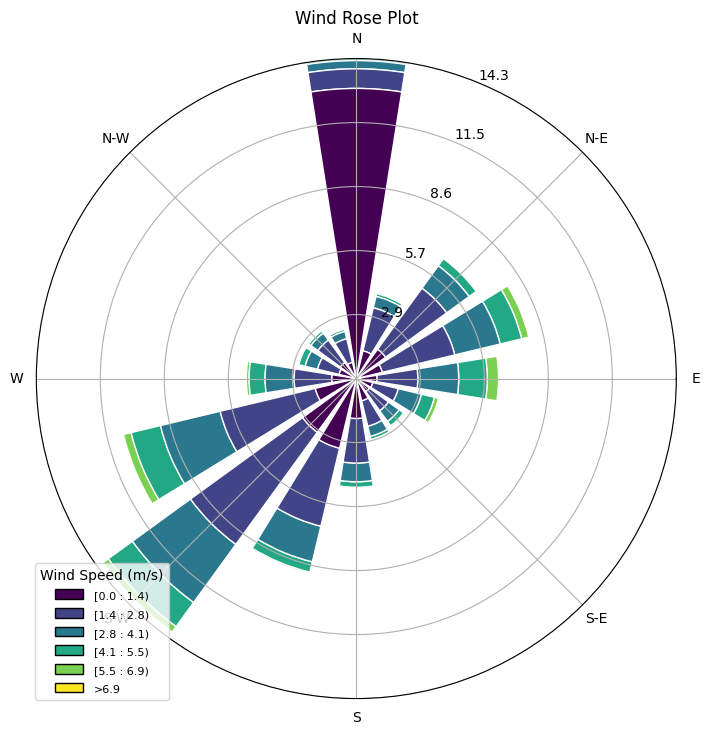

In [202]:

# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title('Wind Rose Plot')

# Create notebooks directory if it doesn't exist
os.makedirs('notebooks', exist_ok=True)
plt.savefig('notebooks/benin/wind_rose_plot.png')
plt.show()

In [203]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('../data/cleaned/benin_cleaned.csv', index=True)
print("Cleaned dataset saved to 'data/cleaned/benin_cleaned.csv'")

Cleaned dataset saved to 'data/cleaned/benin_cleaned.csv'
